In [2]:
# %pip install pandas numpy scikit-learn matplotlib seaborn

In [3]:
# %pip install --upgrade pip

In [4]:
# %pip install openpyxl
# %pip install nltk

In [5]:
# %pip install tensorflow
# ! pip install --upgrade tensorflow-hub
# ! pip install tensorflow-text
# ! pip install pytorch-pretrained-bert

In [6]:
# Import Libs
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import warnings
from nltk.tokenize import word_tokenize
import re

#tensorflow modules
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [7]:
#Import Dataset
blog_gender_dataset = pd.read_excel(r'E:\swaraj-ireland\DBS\Natural Language Processing\BLOG GENDER BALANCED.xlsx')
blog_gender_dataset.head()

C:\Users\shaws\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,BLOG,GENDER
0,Beyond Getting There: What Travel Days Show U...,F
1,I remember so much about the island; the large...,F
2,I have had asthma and allergies my entire life...,M
3,The last few days have been an emotional rolle...,M
4,If you lined up all the teachers and staff in ...,F


In [8]:
#Tokenization
text_tokenization = blog_gender_dataset.copy()

In [9]:
text = text_tokenization['BLOG'][0]
text

' Beyond Getting There: What Travel Days Show Us\n\nToday’s guest post is by Gillian at One-Giant-Step.com sums up for me that imperceptible change that happens when you travel… you start appreciating things you never thought you would.  In that process, maybe you even learn a new way to see the world.\n\n\n\nWho is it that said “It’s not about the destination, it’s about the journey”? Nine months of full time traveling has proven to me that this is absolutely true.\n\nBefore leaving on this trip the thought of an 8 or 10 hour bus trip was pretty daunting. The longest trips we’d taken were on planes, where they serve drinks and meals and we can pass the time watching movies. Eight hours on a bus, without the same amenities sounded like torture but we jumped in right from the start with a 22 hour ride from Lima to Cusco that, while not the most comfortable ride, got us into the swing of things pretty quickly.\n\nOnce we got a routine down…snacks packed, books prepared, podcasts ready…an

In [10]:
#Noise Removal
result = re.sub(r'[\.\?\!\,\:\;\"]', '', text)
print(result)

 Beyond Getting There What Travel Days Show Us

Today’s guest post is by Gillian at One-Giant-Stepcom sums up for me that imperceptible change that happens when you travel… you start appreciating things you never thought you would  In that process maybe you even learn a new way to see the world



Who is it that said “It’s not about the destination it’s about the journey” Nine months of full time traveling has proven to me that this is absolutely true

Before leaving on this trip the thought of an 8 or 10 hour bus trip was pretty daunting The longest trips we’d taken were on planes where they serve drinks and meals and we can pass the time watching movies Eight hours on a bus without the same amenities sounded like torture but we jumped in right from the start with a 22 hour ride from Lima to Cusco that while not the most comfortable ride got us into the swing of things pretty quickly

Once we got a routine down…snacks packed books prepared podcasts ready…and had determined our favorit

In [11]:
blog_gender_dataset.groupby('GENDER').describe()

BLOG                                                               
       count unique                                                top freq
GENDER                                                                     
F       1300   1294   W elcome to the February 28, 2010 edition of ...    2
M       1299   1294  Welcome to Grade 1: "Alright students, what do...    3

In [12]:
blog_gender_dataset.dropna(inplace=True)
blog_gender_dataset['GENDER'].value_counts().to_frame()

,GENDER
F,1300
M,1299


In [13]:
blog_gender_dataset['gender_encoded'] = blog_gender_dataset.GENDER.map({'M':0, 'F':1})
blog_gender_dataset.head()

,BLOG,GENDER,gender_encoded
0,Beyond Getting There: What Travel Days Show U...,F,1
1,I remember so much about the island; the large...,F,1
2,I have had asthma and allergies my entire life...,M,0
3,The last few days have been an emotional rolle...,M,0
4,If you lined up all the teachers and staff in ...,F,1


In [14]:
X = blog_gender_dataset.BLOG
y = blog_gender_dataset.gender_encoded

In [15]:
print(X.shape)
print(y.shape)

(2599,)
(2599,)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2079,)
(520,)
(2079,)
(520,)


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vect =  CountVectorizer()
X_train = vect.fit_transform(X_train)
X_train

<2079x43350 sparse matrix of type '<class 'numpy.int64'>'
	with 414126 stored elements in Compressed Sparse Row format>

In [18]:
X_test= vect.transform(X_test)
X_test

<520x43350 sparse matrix of type '<class 'numpy.int64'>'
	with 99565 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.linear_model import SGDClassifier
import scikitplot as skplt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

In [21]:
#LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_class = lr.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test, y_pred_class))
print('classification report',metrics.classification_report(y_test, y_pred_class))
print('Recall',metrics.recall_score(y_test,y_pred_class))

Accuracy 0.7115384615384616
classification report               precision    recall  f1-score   support

           0       0.71      0.74      0.72       266
           1       0.71      0.69      0.70       254

    accuracy                           0.71       520
   macro avg       0.71      0.71      0.71       520
weighted avg       0.71      0.71      0.71       520

Recall 0.6850393700787402


C:\Users\shaws\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
#NaiveBayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_class = nb.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test, y_pred_class))
print('classification report',metrics.classification_report(y_test, y_pred_class))
print('Recall',metrics.recall_score(y_test,y_pred_class))

Accuracy 0.7346153846153847
classification report               precision    recall  f1-score   support

           0       0.77      0.69      0.73       266
           1       0.71      0.78      0.74       254

    accuracy                           0.73       520
   macro avg       0.74      0.74      0.73       520
weighted avg       0.74      0.73      0.73       520

Recall 0.7834645669291339


In [23]:
#SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_class = svc.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test, y_pred_class))
print('classification report',metrics.classification_report(y_test, y_pred_class))
print('Recall',metrics.recall_score(y_test,y_pred_class))

Accuracy 0.6807692307692308
classification report               precision    recall  f1-score   support

           0       0.72      0.62      0.67       266
           1       0.65      0.74      0.69       254

    accuracy                           0.68       520
   macro avg       0.68      0.68      0.68       520
weighted avg       0.68      0.68      0.68       520

Recall 0.7401574803149606


In [24]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test, y_pred_class))
print('classification report',metrics.classification_report(y_test, y_pred_class))
print('Recall',metrics.recall_score(y_test,y_pred_class))

Accuracy 0.5788461538461539
classification report               precision    recall  f1-score   support

           0       0.60      0.55      0.57       266
           1       0.56      0.61      0.59       254

    accuracy                           0.58       520
   macro avg       0.58      0.58      0.58       520
weighted avg       0.58      0.58      0.58       520

Recall 0.610236220472441


In [25]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_class = dt.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test, y_pred_class))
print('classification report',metrics.classification_report(y_test, y_pred_class))
print('Recall',metrics.recall_score(y_test,y_pred_class))

Accuracy 0.5884615384615385
classification report               precision    recall  f1-score   support

           0       0.60      0.60      0.60       266
           1       0.58      0.58      0.58       254

    accuracy                           0.59       520
   macro avg       0.59      0.59      0.59       520
weighted avg       0.59      0.59      0.59       520

Recall 0.5787401574803149


In [26]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_class = rf.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test, y_pred_class))
print('classification report',metrics.classification_report(y_test, y_pred_class))
print('Recall',metrics.recall_score(y_test,y_pred_class))

Accuracy 0.7
classification report               precision    recall  f1-score   support

           0       0.73      0.66      0.69       266
           1       0.68      0.74      0.71       254

    accuracy                           0.70       520
   macro avg       0.70      0.70      0.70       520
weighted avg       0.70      0.70      0.70       520

Recall 0.7401574803149606


In [32]:
# MLP Classifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred_class = mlp.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test, y_pred_class))
print('classification report',metrics.classification_report(y_test, y_pred_class))
print('Recall',metrics.recall_score(y_test,y_pred_class))

Accuracy 0.6961538461538461
classification report               precision    recall  f1-score   support

           0       0.70      0.71      0.71       266
           1       0.69      0.68      0.69       254

    accuracy                           0.70       520
   macro avg       0.70      0.70      0.70       520
weighted avg       0.70      0.70      0.70       520

Recall 0.6771653543307087


In [33]:
import pickle as pk

In [34]:
pk.dump(mlp,open("./model/neuralnetmodel.pkl",'wb'))

In [35]:
pk.dump(nb,open("./model/naivebayesmodel.pkl",'wb'))

In [ ]:
# !pip install scikit-plot

In [ ]:
# param_grid = {'C': [0.1, 1, 10],
#                            'gamma': [1, 0.1, 0.01]}
# Models = {
#             "model_lr" : LogisticRegression(),
#             "model_multibinomial": MultinomialNB(),
#             "model_svc": SVC(),
#             'model_decision_tree': DecisionTreeClassifier(),
#             'model_random_forest': RandomForestClassifier(),
#             'model_neural_net': MLPClassifier()}
#             # 'model_SGD': SGDClassifier(loss="hinge", penalty="l2", max_iter=100)}



	model_lr	LogisticRegression()




C:\Users\shaws\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.76      0.63      0.69       252
           1       0.70      0.81      0.75       268

    accuracy                           0.72       520
   macro avg       0.73      0.72      0.72       520
weighted avg       0.73      0.72      0.72       520



[[159  93]
 [ 51 217]]




	model_multibinomial	MultinomialNB()


              precision    recall  f1-score   support

           0       0.76      0.63      0.69       252
           1       0.70      0.81      0.75       268

    accuracy                           0.72       520
   macro avg       0.73      0.72      0.72       520
weighted avg       0.73      0.72      0.72       520



[[159  93]
 [ 51 217]]




	model_svc	SVC()


              precision    recall  f1-score   support

           0       0.76      0.63      0.69       252
           1       0.70      0.81      0.75       268

    accuracy                           0.72       520
   macro avg

C:\Users\shaws\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


              precision    recall  f1-score   support

           0       0.76      0.63      0.69       252
           1       0.70      0.81      0.75       268

    accuracy                           0.72       520
   macro avg       0.73      0.72      0.72       520
weighted avg       0.73      0.72      0.72       520



[[159  93]
 [ 51 217]]




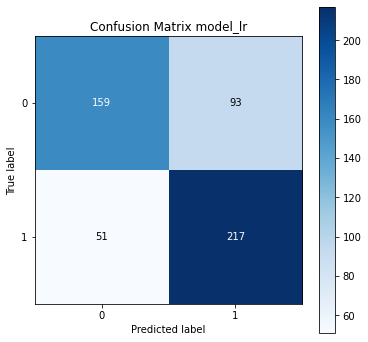

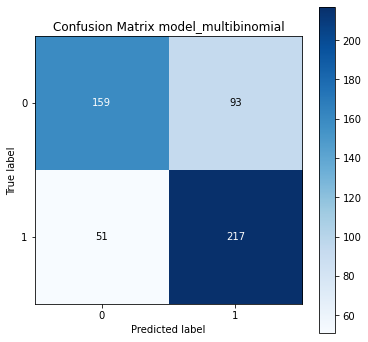

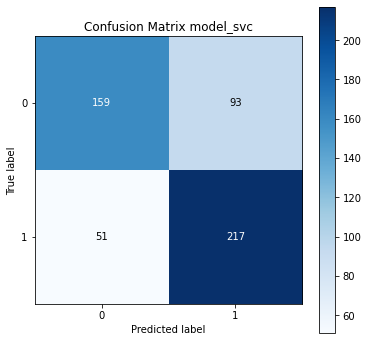

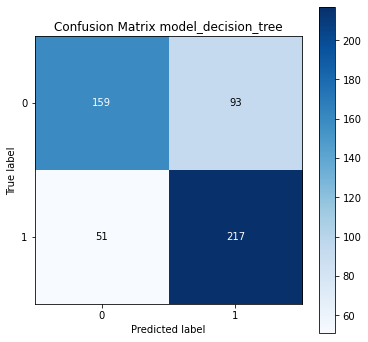

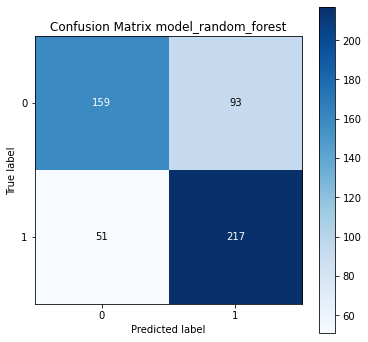

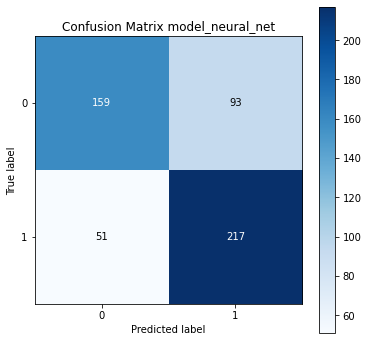

In [ ]:
# for counter, model in Models.items():
#     print("="*65)
#     print("\n")
#     print("\t{}\t{}".format(counter, model))
#     print("\n")
#     model.fit(X_train, y_train)
#     pred = model.predict(X_test)
#     report = classification_report(y_test, y_pred_class)
#     print(report)
#     print("\n")
#     print(confusion_matrix(y_test, y_pred_class))
#     print("\n")
#     skplt.metrics.plot_confusion_matrix(y_test, y_pred_class, figsize=(6,6), title="Confusion Matrix {}".format(counter))